<a href="https://colab.research.google.com/github/haniklakhe18/Temperature_analysis/blob/main/4_Timeseries_lineplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Ensemble'

/content/drive/My Drive/Ensemble


In [ ]:
!pip install geopandas
!pip install rasterio
!pip install pyidw
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import numpy as np
import fiona
from sklearn.metrics import mean_squared_error
import rasterio
import rasterio.plot
import rasterio.mask
import glob
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.colors import Normalize
import math
import os
from matplotlib.lines import Line2D
from tqdm import tqdm
import matplotlib.ticker as ticker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
CM = ['ACCESS-CM2','ACCESS-ESM1-5','BCC-CSM2-MR','CanESM5',
      'EC-Earth3','EC-Earth3-Veg','INM-CM4-8','INM-CM5-0',
      'MPI-ESM1-2-LR','MPI-ESM1-2-HR','MRI-ESM2-0','NorESM2-LM',
      'NorESM2-MM','Ensemble_median']
#CM = ['Ensemble_median']

scenario = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

CM_dict = {}

for i in tqdm(range(0,len(CM))):
    CM_dict[CM[i]] = {}
    for j in range(0,len(scenario)):
        ssp_dict = {}
        CM_dict[CM[i]][scenario[j]] = ssp_dict
        file_path = str(CM[i]) + '/' + str(scenario[j]) + '/'
        indices_files = glob.glob('Database' + '/' + file_path + '*.csv')
        for k in range(0, len(indices_files)):
            indices = pd.read_csv(indices_files[k])
            indices = indices.transpose()
            col_names = indices.iloc[0].astype(int)
            indices = indices[1:]
            indices.columns = col_names
            indices = indices.reset_index()
            indices.rename(columns={'index': 'Year'}, inplace=True)
            indices = indices.iloc[:-5,:]
            print(indices)
            indices.rename(index={'Station': 'index'})
            indices['Mean'] = np.ceil(indices.iloc[:, 1:216].mean(axis=1))
            # Extract the filename without the extension and use it as the key
            base_name = os.path.basename(indices_files[k])
            indice_name = os.path.splitext(base_name)[0]
            #print(indice_name)
            ssp_dict[indice_name] = indices

# Now you can access the data using the nested dictionary structure
# For example: CM_dict['ACCESS-CM2']['ssp126']['DTR']


<ipython-input-5-8a4934b5319f>:37: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend(handles, labels, loc='upper right', fontsize=12, bbox_to_anchor=(1.15, 1))


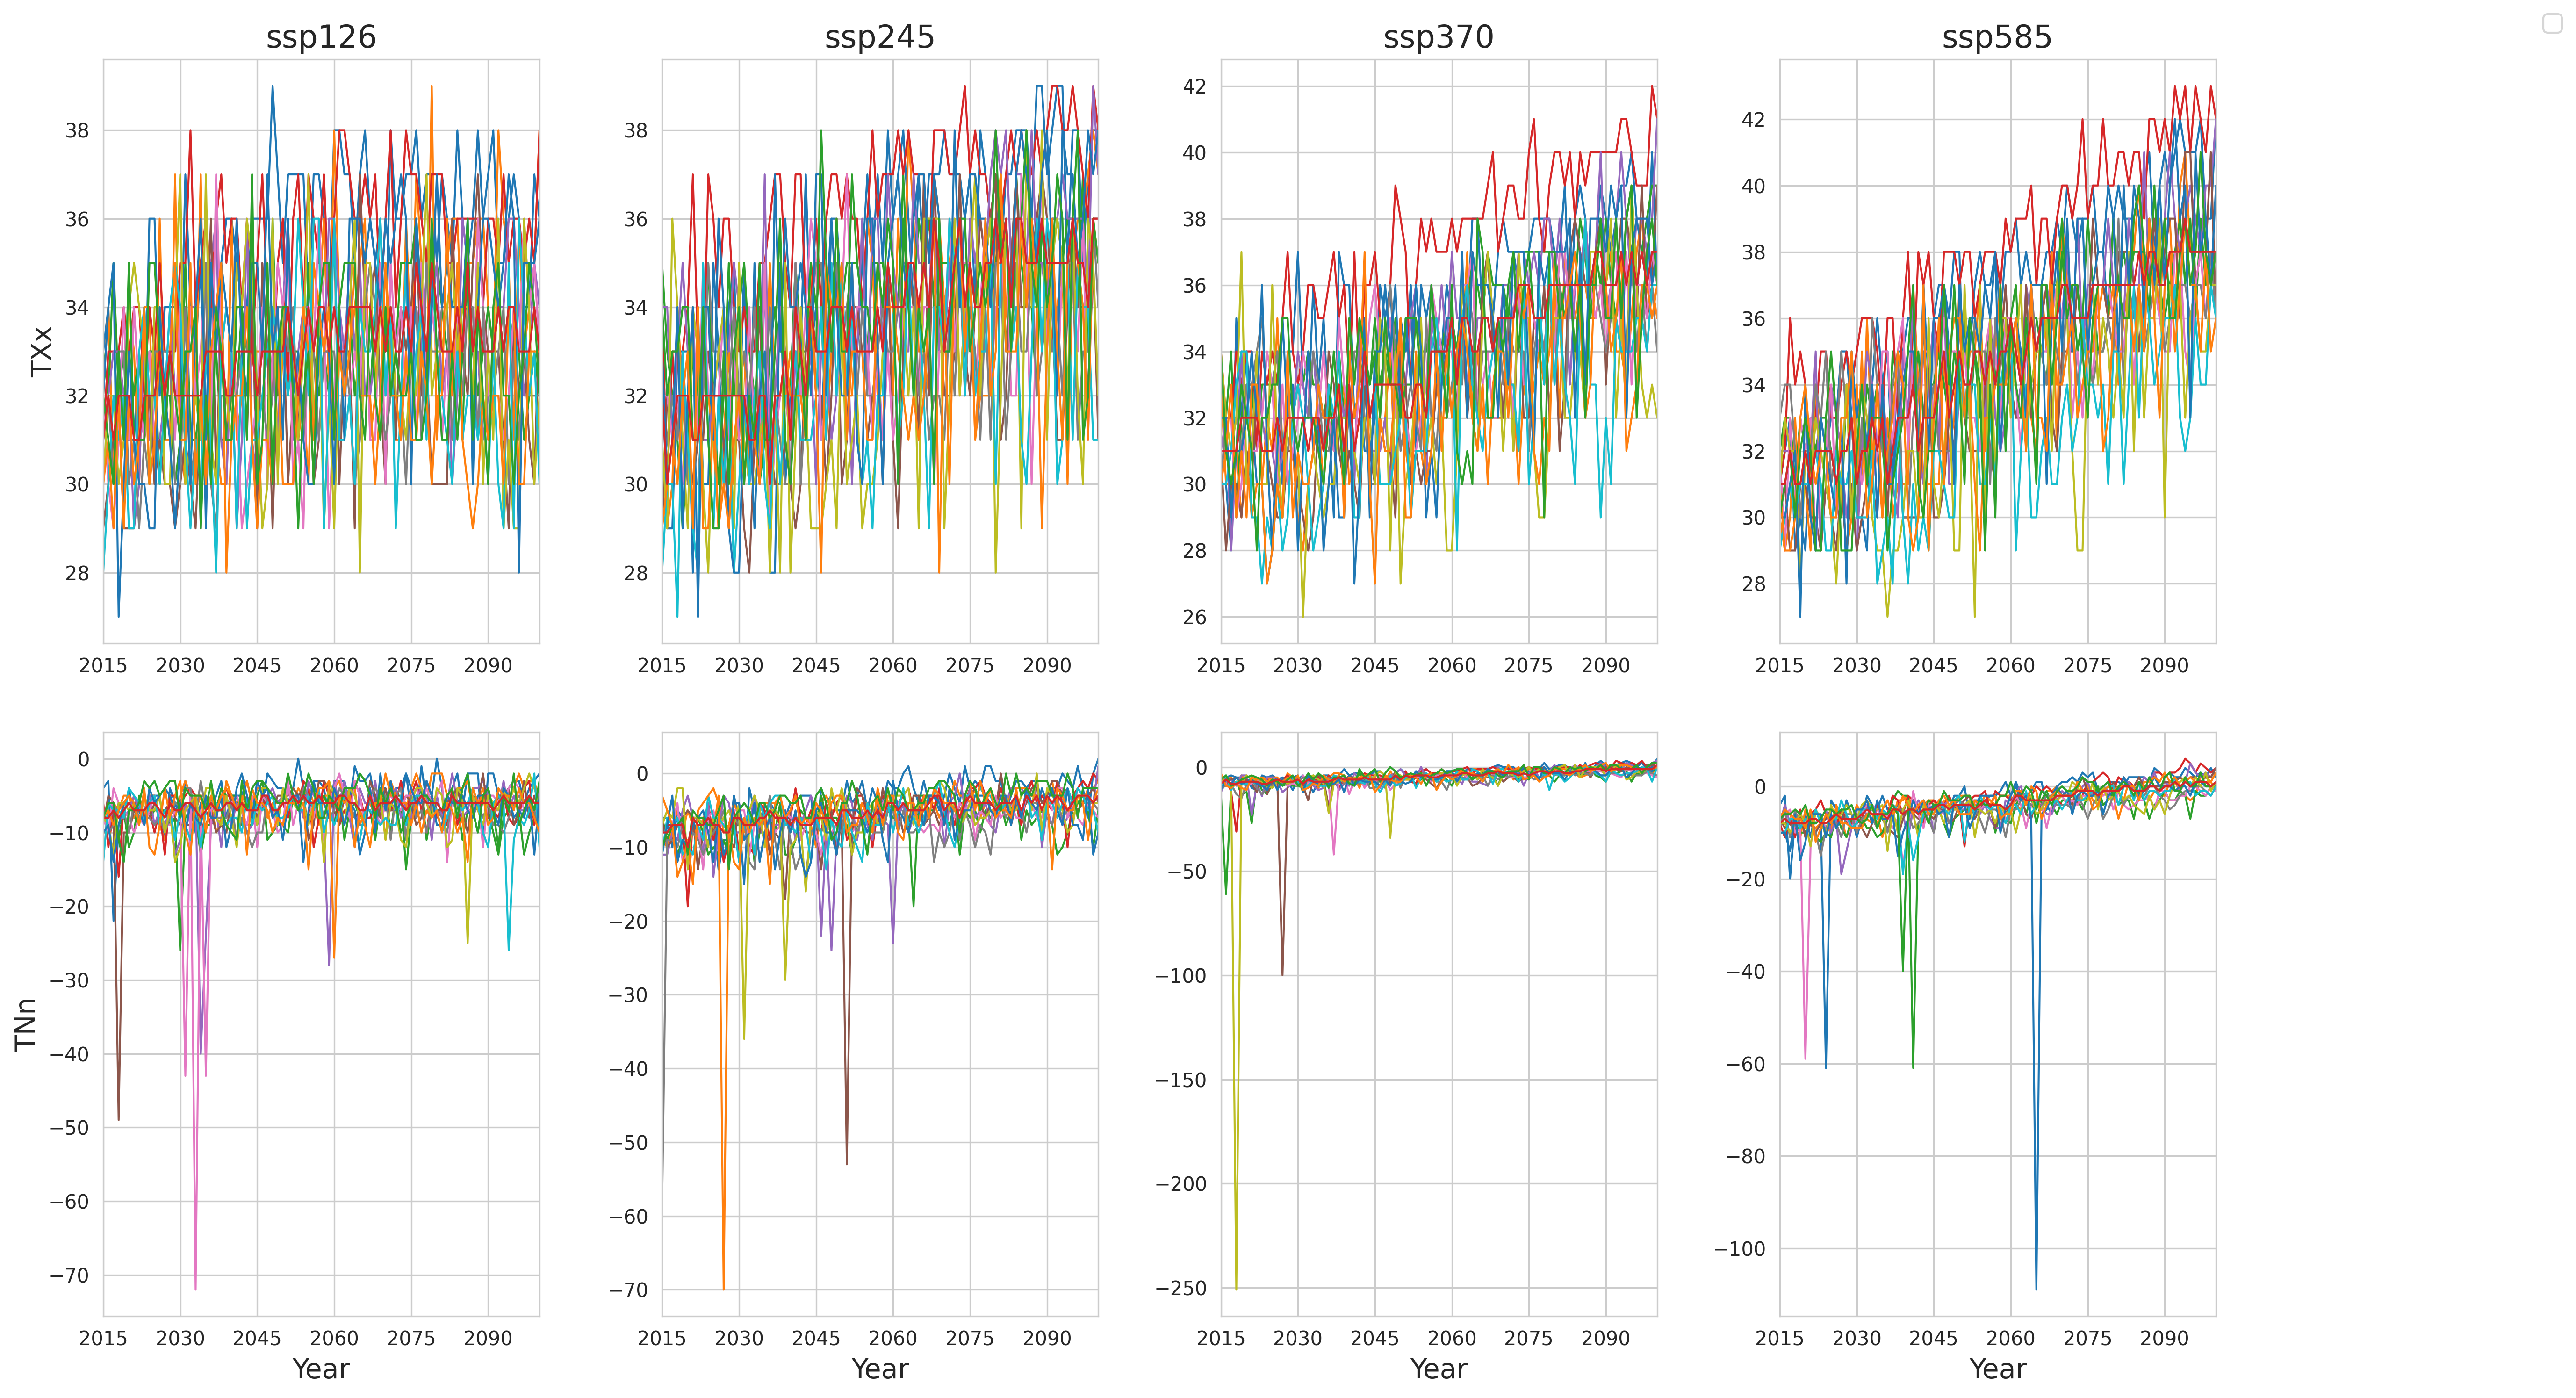

In [ ]:
# Define your variables like CM, scenario, and CM_dict
#indices = ['FD','ID','SU','TR','WSDI', 'CSDI','DTR','X95p']
#indices = ['TXn', 'TXx', 'TNx','TNn', 'Nlt10p','Ntg90p', 'Xlt10p', 'Xtg90p']
indices = ['TXx','TNn']
#color = ['dodgerblue','darkviolet','lime','peru','firebrick']
sns.set_style("whitegrid")
fig, axs = plt.subplots(len(indices),len(scenario), figsize=(16, 10), dpi = 300)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

handles = []  # List to store legend handles
labels = []  # List to store legend labels

for j in tqdm(range(0,len(indices))):
  for k in range(0,len(scenario)):
    for i in range(0,len(CM)):
      ax = axs[j, k]  # Access the correct subplot
      ssp_data = CM_dict[CM[i]][scenario[k]][indices[j]].iloc[64:,:]
      ax = sns.lineplot(ax=ax, data=ssp_data, x=ssp_data['Year'], y="Mean", linewidth=1, label=CM[i])
      handles.append(ax)
      labels.append(CM[i])
      ax.xaxis.set_major_locator(ticker.MultipleLocator(base=15))
      ax.set_xlim(min(ssp_data['Year']), max(ssp_data["Year"]))
      ax.set_xlabel(' ', fontsize=14)
      ax.set_ylabel(' ', fontsize=14)
      if j == 1:
        ax.set_xlabel('Year', fontsize=14)
      else:
        ax.set_title(scenario[k], fontsize=16)  # Set title

      if k ==0:
         ax.set_ylabel(indices[j], fontsize=14)
      plt.tight_layout()
      ax.get_legend().remove()
      plt.tight_layout()

# Create the legend outside the plot
fig.legend(handles, labels, loc='upper right', fontsize=12, bbox_to_anchor=(1.15, 1))
plt.show()

#plt.text(-0.135, 0.5, scenario[k], transform=ax.transAxes, va='center', rotation='vertical', fontsize=14)





